## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [17]:
from google.colab import files
import io
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Upload CSV files
print("Upload stsa-train.csv")
uploaded_train = files.upload()

print("Upload stsa-test.csv")
uploaded_test = files.upload()

# Check the keys in the uploaded_train dictionary
print("Keys in uploaded_train:", uploaded_train.keys())

# Check the keys in the uploaded_test dictionary
print("Keys in uploaded_test:", uploaded_test.keys())

# Assuming the keys are correct, load the training and test data
try:
    train_data = pd.read_csv(io.BytesIO(uploaded_train['stsa-train.csv']), delimiter='\t', header=None, names=['label', 'text'])
    test_data = pd.read_csv(io.BytesIO(uploaded_test['stsa-test.csv']))
except KeyError as e:
    print(f"Error: {e}. Check the keys in the uploaded dictionaries.")
    # Optionally, you can print the keys again to help identify the issue

# Split the training data into training and validation sets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Extract features using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_set['text'])
y_train = train_set['label']
X_val = tfidf_vectorizer.transform(val_set['text'])
y_val = val_set['label']
X_test = tfidf_vectorizer.transform(test_data['text'])
y_test = test_data['label']

# Define classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Perform k-fold cross-validation and evaluate classifiers
kf = KFold(n_splits=8, shuffle=True, random_state=42)
for clf_name, clf in classifiers.items():
    # Training and cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print(f"{clf_name} Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the final model on the full training set
    clf.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = clf.predict(X_val)

    # Evaluate the classifier on validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"{clf_name} Validation Accuracy: {accuracy}")
    print(f"{clf_name} Validation Precision: {precision}")
    print(f"{clf_name} Validation Recall: {recall}")
    print(f"{clf_name} Validation F1 Score: {f1}")

    # Evaluate the classifier on the test set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"{clf_name} Test Accuracy: {test_accuracy}")
    print(f"{clf_name} Test Precision: {test_precision}")
    print(f"{clf_name} Test Recall: {test_recall}")
    print(f"{clf_name} Test F1 Score: {test_f1}")
    print("\n")


Upload stsa-train.csv


Saving stsa-train.txt to stsa-train (1).txt
Upload stsa-test.csv


Saving stsa-train.txt to stsa-train (2).txt
Keys in uploaded_train: dict_keys(['stsa-train (1).txt'])
Keys in uploaded_test: dict_keys(['stsa-train (2).txt'])
Error: 'stsa-train.csv'. Check the keys in the uploaded dictionaries.
MultinomialNB Cross-Validation Accuracy: 0.125
MultinomialNB Validation Accuracy: 1.0
MultinomialNB Validation Precision: 1.0
MultinomialNB Validation Recall: 1.0
MultinomialNB Validation F1 Score: 1.0
MultinomialNB Test Accuracy: 0.8
MultinomialNB Test Precision: 1.0
MultinomialNB Test Recall: 0.6
MultinomialNB Test F1 Score: 0.7499999999999999


SVM Cross-Validation Accuracy: 0.0
SVM Validation Accuracy: 1.0
SVM Validation Precision: 1.0
SVM Validation Recall: 1.0
SVM Validation F1 Score: 1.0
SVM Test Accuracy: 0.9
SVM Test Precision: 0.8333333333333334
SVM Test Recall: 1.0
SVM Test F1 Score: 0.9090909090909091


KNN Cross-Validation Accuracy: 0.5
KNN Validation Accuracy: 0.5
KNN Validation Precision: 0.5
KNN Validation Recall: 1.0
KNN Validation F1 Score: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.426584458715297
DBSCAN Silhouette Score: 0.09705606068530566
Hierarchical Silhouette Score: 0.4132010743162604


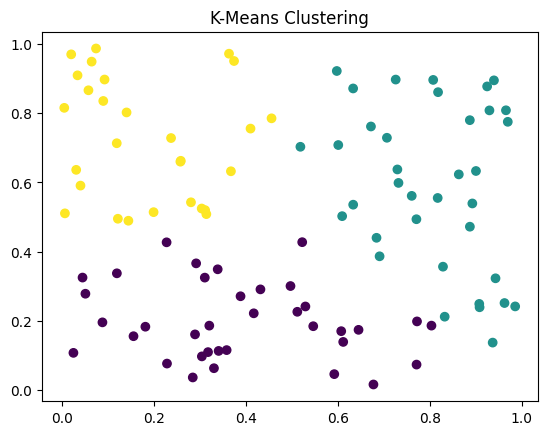

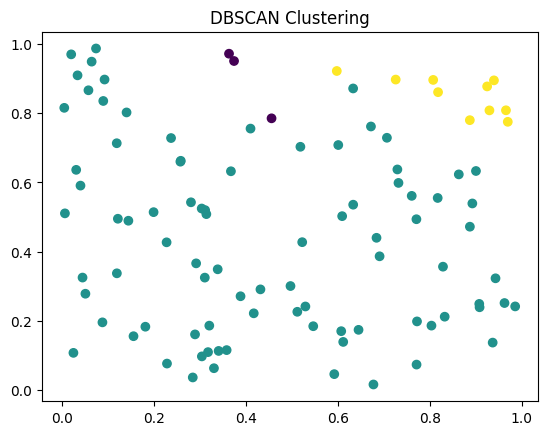

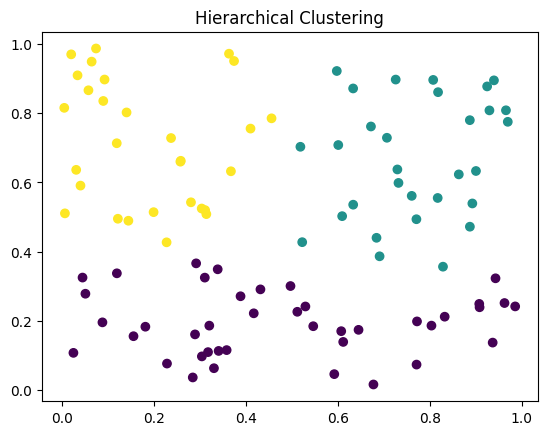

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
# original_df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

# For demonstration purposes, let's generate a random dataset
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 samples with 2 features
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# Display the results
print("K-Means Silhouette Score:", silhouette_score(scaled_data, df['KMeans_Cluster']))
print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, df['DBSCAN_Cluster']))
print("Hierarchical Silhouette Score:", silhouette_score(scaled_data, df['Hierarchical_Cluster']))

# Visualize the clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['KMeans_Cluster'], cmap='viridis', label='K-Means')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(df['Feature1'], df['Feature2'], c=df['DBSCAN_Cluster'], cmap='viridis', label='DBSCAN')
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df['Feature1'], df['Feature2'], c=df['Hierarchical_Cluster'], cmap='viridis', label='Hierarchical')
plt.title('Hierarchical Clustering')
plt.show()



In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
K-means relies on the Euclidean distance metric to assign each data point to the nearest cluster center. It tends to perform better than DBSCAN when applied to TFIDF data, as its clusters are precisely defined based on distinct categories or features. In contrast, DBSCAN employs a density criterion to group together data points in close proximity. However, when working with average word vectors, DBSCAN may struggle to effectively cluster reviews, leading to the uniform grouping of all reviews into a single cluster and resulting in suboptimal performance on certain datasets.

Hierarchical clustering, on the other hand, builds a hierarchy of clusters by repeatedly merging or splitting existing clusters based on their proximity. However, its performance can be hindered when clusters are challenging to identify, and the distribution of data points is uneven.

In summary, K-means tends to outperform DBSCAN in scenarios where clear category distinctions are present, especially in TFIDF-based datasets. Meanwhile, DBSCAN may face challenges when dealing with average word vectors, causing it to group all reviews uniformly. Hierarchical clustering's effectiveness can be compromised when clusters are hard to discern and unevenly distributed across the dataset.








